In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\laimi\\Downloads\\pendingpositions_20240816_043004.csv")

In [5]:
# Check for missing values
print(df.isnull().sum())
print(df.describe())
print(df.info())

Ticker              0
Bid                 0
NumberOfShares      0
StopPrice           1
Created             0
Closed             24
Purchased           0
Strategy            1
CloseReason       252
Notes               0
dtype: int64
              Bid  NumberOfShares   StopPrice
count  521.000000      521.000000  520.000000
mean   107.299519        4.794626  105.076538
std    119.172099       12.532652  117.151039
min      5.550000      -30.000000    5.000000
25%     37.630000       -2.000000   37.000000
50%     67.520000        5.000000   66.000000
75%    124.420000       11.000000  120.000000
max    949.500000       50.000000  930.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ticker          521 non-null    object 
 1   Bid             521 non-null    float64
 2   NumberOfShares  521 non-null    float64
 3   StopPrice       52

In [68]:
# clean step

# number of rows before clean
print(f"number of rows before clean: {len(df)}")

df_cleaned = df.dropna(subset="StopPrice").copy()

# convert rows to proper types
df_cleaned["Created"] = pd.to_datetime(df_cleaned["Created"])
df_cleaned["Closed"] = pd.to_datetime(df_cleaned["Closed"])
df_cleaned["PositionSize"] = df_cleaned['NumberOfShares'] * df_cleaned["Bid"]
df_cleaned["StopPricePct"] = ((df_cleaned["StopPrice"] - df_cleaned["Bid"])/df_cleaned["Bid"])*100

# split into longs and shorts
longs = df_cleaned[df_cleaned["NumberOfShares"] > 0].copy()
shorts = df_cleaned[df_cleaned["NumberOfShares"] < 0].copy()

longs_purchased = longs[longs["Purchased"]==1]

print(f"number of rows after clean: {len(df_cleaned)}")
print(f"number of longs: {len(longs)}")
print(f"number of purchased longs: {len(longs_purchased)}")
print(f"number of shorts: {len(shorts)}")

number of rows before clean: 521
number of rows after clean: 520
number of longs: 382
number of purchased longs: 170
number of shorts: 138


In [70]:
print("NOTE: the next set of analysis is on long positions")

total_positions = len(longs)
print(f"Total positions: {total_positions}")

num_days = (longs['Created'].max() - longs['Created'].min()).days
print(f"Spanning {num_days} Number of days")

purchased_positions = longs['Purchased'].sum()
purchased_percentage = (purchased_positions / total_positions) * 100
print(f"% Purchased: {purchased_positions} ({purchased_percentage:.2f}%)")

NOTE: the next set of analysis is on long positions
Total positions: 382
Spanning 465 Number of days
% Purchased: 170 (44.50%)


Average size of positions: 667.06
Max position size: 2032.50
Min position size: 94.80


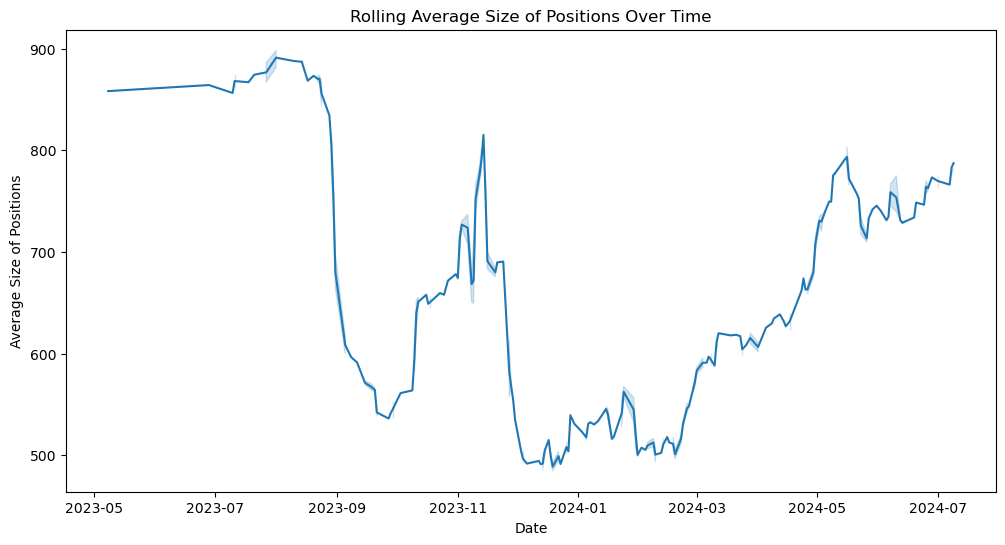

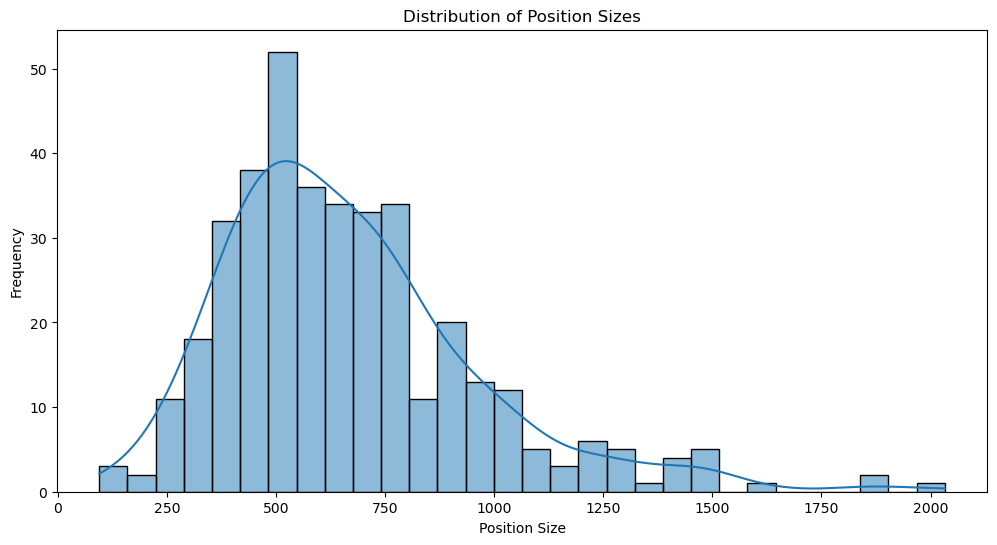

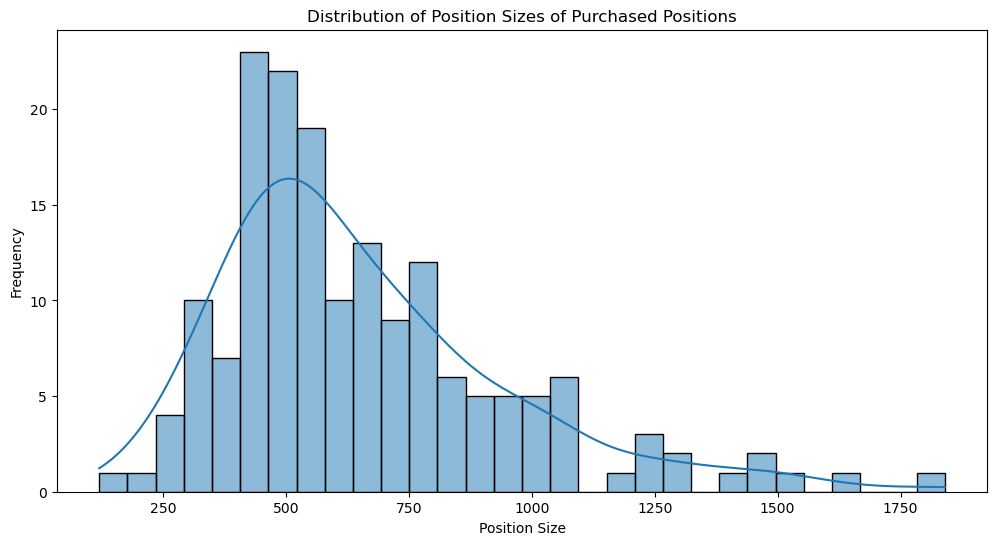

In [72]:

print(f'Average size of positions: {longs["PositionSize"].mean():.2f}')
print(f'Max position size: {longs["PositionSize"].max():.2f}')
print(f'Min position size: {longs["PositionSize"].min():.2f}')

longs['rolling_average_size'] = longs["PositionSize"].rolling(window=30).mean()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=longs, x='Created', y='rolling_average_size')
plt.title('Rolling Average Size of Positions Over Time')
plt.xlabel('Date')
plt.ylabel('Average Size of Positions')
plt.show()

# Plot the distribution of position sizes
plt.figure(figsize=(12, 6))
sns.histplot(longs["PositionSize"], bins=30, kde=True)
plt.title('Distribution of Position Sizes')
plt.xlabel('Position Size')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of purchased position sizes
plt.figure(figsize=(12, 6))
sns.histplot(longs_purchased["PositionSize"], bins=30, kde=True)
plt.title('Distribution of Position Sizes of Purchased Positions')
plt.xlabel('Position Size')
plt.ylabel('Frequency')
plt.show()

In [64]:
# List the top 10 largest position rows
largest_positions = longs.nlargest(10, ["PositionSize"])
print("\nTop 10 Largest Positions:")
largest_positions[["Ticker","Created","Bid","StopPrice","StopPricePct","Strategy","Purchased","PositionSize"]]


Top 10 Largest Positions:


,Ticker,Created,Bid,StopPrice,StopPricePct,Strategy,Purchased,PositionSize
387,RLI,2023-11-24,135.50,130.0,-4.059041,resistancebreakthrough,False,2032.50
386,SPEU,2023-11-27,37.60,37.0,-1.595745,recovery,False,1880.00
487,RBC,2023-08-31,230.00,220.0,-4.347826,leadingindustry,True,1840.00
493,EGP,2023-08-29,179.49,180.0,0.284138,leadingindustry,True,1615.41
71,CAT,2024-06-10,301.00,290.0,-3.654485,channelbottom,False,1505.00
400,AVY,2023-11-15,187.95,180.0,-4.229848,leadingindustry,True,1503.60
519,SEDG,2023-06-28,249.60,240.0,-3.846154,channelbottom,False,1497.60
109,MAA,2024-05-07,133.00,130.0,-2.255639,descendingchannelbreakthrough,True,1463.00
72,DKS,2024-06-10,182.00,170.0,-6.593407,newhighpullback,False,1456.00
430,BABA,2023-11-06,85.31,83.0,-2.707772,channelbottom,True,1450.27


In [80]:
# List the top 10 largest position rows that were purchased
largest_positions = longs_purchased.nlargest(20, ["PositionSize"])
print("\nTop 10 Largest Positions:")
largest_positions[["Ticker","Created","Bid", "NumberOfShares","StopPrice","StopPricePct","Strategy","Purchased","PositionSize"]]


Top 10 Largest Positions:


,Ticker,Created,Bid,NumberOfShares,StopPrice,StopPricePct,Strategy,Purchased,PositionSize
487,RBC,2023-08-31,230.00,8.0,220.0,-4.347826,leadingindustry,True,1840.00
493,EGP,2023-08-29,179.49,9.0,180.0,0.284138,leadingindustry,True,1615.41
400,AVY,2023-11-15,187.95,8.0,180.0,-4.229848,leadingindustry,True,1503.60
109,MAA,2024-05-07,133.00,11.0,130.0,-2.255639,descendingchannelbreakthrough,True,1463.00
430,BABA,2023-11-06,85.31,17.0,83.0,-2.707772,channelbottom,True,1450.27
491,GWW,2023-08-30,717.80,2.0,690.0,-3.872945,channelbottom,True,1435.60
467,MCK,2023-09-20,432.07,3.0,420.0,-2.793529,channelbottom,True,1296.21
45,DDS,2024-07-01,426.00,3.0,420.0,-1.408451,channelbottom,True,1278.00
489,ALV,2023-08-30,97.20,13.0,93.0,-4.320988,channelbottom,True,1263.60
424,HLT,2023-11-06,156.81,8.0,150.0,-4.342835,leadingindustry,True,1254.48


In [78]:
smallest_positions = longs.nsmallest(10, ["PositionSize"])
print("\nTop 10 Smallest Positions:")
smallest_positions[["Ticker","Created","Bid","StopPrice","StopPricePct","Strategy","Purchased","PositionSize"]]


Top 10 Smallest Positions:


,Ticker,Created,Bid,StopPrice,StopPricePct,Strategy,Purchased,PositionSize
345,QS,2024-01-05,9.48,7.2,-24.050633,10x,False,94.80
360,ZIMV,2023-12-19,17.10,14.0,-18.128655,10x,True,119.70
313,NET,2024-01-23,78.00,75.0,-3.846154,resistancebreakthrough,False,156.00
416,METC,2023-11-10,16.00,16.0,0.000000,10x,False,160.00
357,RKLB,2023-12-23,5.55,5.0,-9.909910,10x,False,205.35
470,MAG,2023-09-18,11.60,11.0,-5.172414,resistancebreakthrough,False,232.00
372,CAVA,2023-12-13,38.87,37.0,-4.810908,10x,True,233.22
418,HCI,2023-11-09,78.38,76.0,-3.036489,newhigh,False,235.14
374,GTLB,2023-12-06,58.99,55.0,-6.763858,10x,False,235.96
466,SCS,2023-09-21,10.51,9.6,-8.658421,postearningsnewhigh,True,241.73


In [58]:
longs['Duration'] = (longs['Closed'] - longs['Created']).dt.days
avg_duration_purchased = longs[longs['Purchased'] == 1]['Duration'].mean()
avg_duration_not_purchased = longs[longs['Purchased'] == 0]['Duration'].mean()
max_duration_purchased = longs[longs['Purchased'] == 1]['Duration'].max()

print(f"Average duration for purchased positions: {avg_duration_purchased:.2f} days")
print(f"Average duration for not purchased positions: {avg_duration_not_purchased:.2f} days")
print(f"Max duration for not purchased positions: {max_duration_purchased:.2f} days")

Average duration for purchased positions: 7.16 days
Average duration for not purchased positions: 13.66 days
Max duration for not purchased positions: 116.00 days


In [ ]:
avg_stop_loss_all = df['StopPrice'].mean()
avg_stop_loss_purchased = df[df['Purchased'] == 1]['StopPrice'].mean()
avg_stop_loss_not_purchased = df[df['Purchased'] == 0]['StopPrice'].mean()

print(f"Average stop loss for all positions: {avg_stop_loss_all:.2f}")
print(f"Average stop loss for purchased positions: {avg_stop_loss_purchased:.2f}")
print(f"Average stop loss for not purchased positions: {avg_stop_loss_not_purchased:.2f}")